In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import IPython
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
from tqdm import tqdm

from nara_wpe.wpe import wpe
from nara_wpe.wpe import get_power
from nara_wpe.utils import stft, istft, get_stft_center_frequencies
from nara_wpe import project_root


In [2]:
stft_options = dict(size=512, shift=128)

In [3]:
def aquire_audio_data():
    D, T = 4, 10000
    y = np.random.normal(size=(D, T))
    return y

In [4]:
y = aquire_audio_data()
Y = stft(y, **stft_options)
Y = Y.transpose(2, 0, 1)

Z = wpe(Y)
z_np = istft(Z.transpose(1, 2, 0), size=stft_options['size'], shift=stft_options['shift'])

In [5]:
channels = 8
sampling_rate = 16000
delay = 3
iterations = 5
taps = 10
alpha=0.9999

In [7]:
file_template = ['/home/yangwenhao/storage/dataset/CN-Celeb/data/id00000/singing-01-001.wav',
                 '/home/yangwenhao/storage/dataset/CN-Celeb/data/id00001/entertainment-01-001.wav']
signal_list = [ sf.read(f)[0][:64000] for f in file_template]
y = np.stack(signal_list, axis=0)
IPython.display.Audio(y[0], rate=sampling_rate)

In [24]:
import noisereduce as nr
reduced_noise = []
# load data
for data in signal_list:
#     signal_list = [ sf.read(f)[0][:64000] for f in file_template]
    # perform noise reduction
    reduced_noise.append(nr.reduce_noise(y=data, sr=sampling_rate))
reduced_noise = np.stack(reduced_noise, axis=0)

IPython.display.Audio(reduced_noise[0], rate=sampling_rate)  


In [26]:
print(reduced_noise.shape)
print(reduced_noise[0][:10])
Y_reduced_noise = stft(reduced_noise, **stft_options).transpose(2, 0, 1)

print(Y_reduced_noise.shape)


(2, 64000)
[-2.58764601e-04  2.79551242e-04  9.28647568e-05  2.65910237e-05
 -4.71923333e-04  7.02837579e-04  2.87758760e-04 -3.96816845e-04
  1.59994301e-04 -2.52902401e-04]
(257, 2, 503)


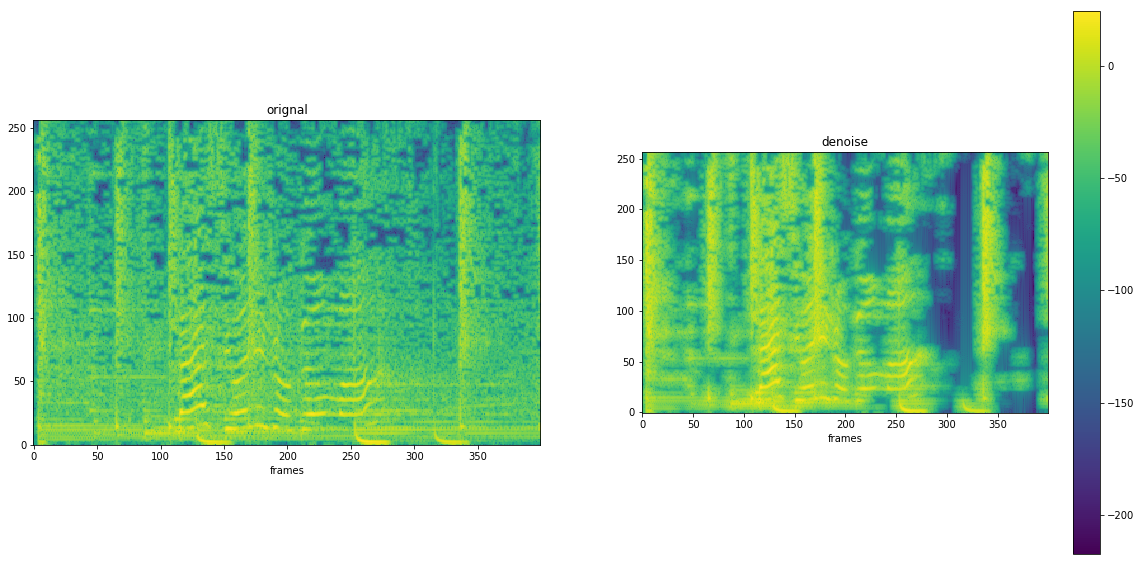

In [35]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(20, 10))
im1 = ax1.imshow(20 * np.log10(np.abs(Y[ :, 0, :400])), origin='lower')
ax1.set_xlabel('frames')
_ = ax1.set_title('orignal')
im2 = ax2.imshow(20 * np.log10(np.abs(Y_reduced_noise[:, 0, :400])), origin='lower')
ax2.set_xlabel('frames')
_ = ax2.set_title('denoise')
cb = fig.colorbar(im2)

In [29]:
print(20 * np.log10(np.abs(Y_reduced_noise[0, 200:400, :])).T)

[]


In [27]:
print(y.shape)
print(y[0][:10])

Y = stft(y, **stft_options).transpose(2, 0, 1)
print(Y.shape)


(2, 64000)
[-0.00024414  0.00018311  0.00045776 -0.00039673 -0.00076294  0.00244141
  0.00085449 -0.0007019  -0.00100708 -0.00045776]
(257, 2, 503)


In [9]:
Z = wpe(
    Y,
    taps=taps,
    delay=delay,
    iterations=iterations,
    statistics_mode='full'
).transpose(1, 2, 0)
z = istft(Z, size=stft_options['size'], shift=stft_options['shift'])
IPython.display.Audio(z[0], rate=sampling_rate)

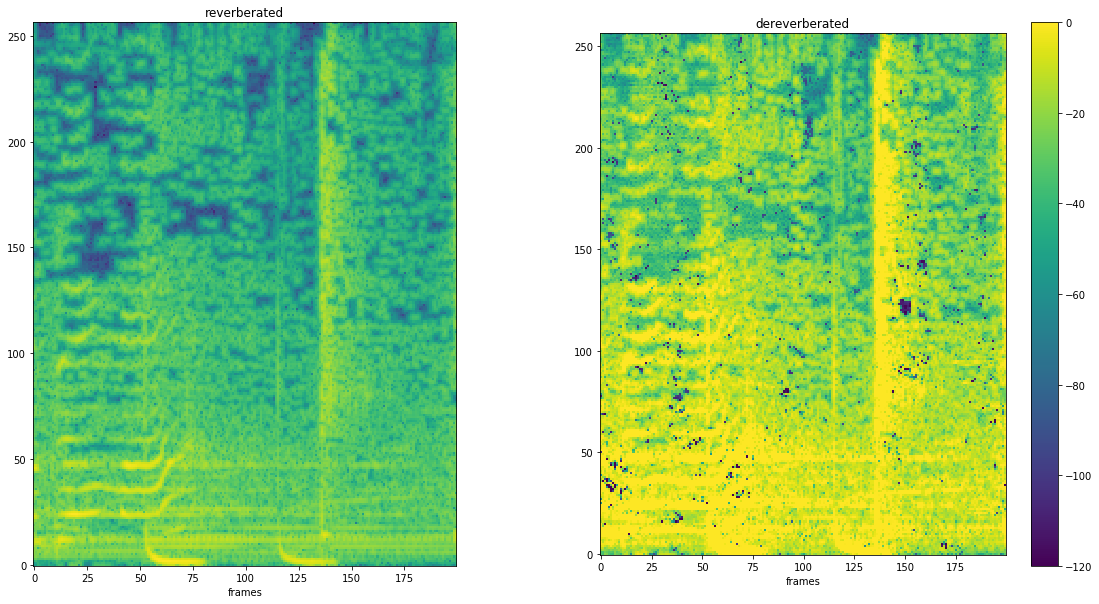

In [10]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(20, 10))
im1 = ax1.imshow(20 * np.log10(np.abs(Y[ :, 0, 200:400])), origin='lower')
ax1.set_xlabel('frames')
_ = ax1.set_title('reverberated')
im2 = ax2.imshow(20 * np.log10(np.abs(Z[0, 200:400, :])).T, origin='lower', vmin=-120, vmax=0)
ax2.set_xlabel('frames')
_ = ax2.set_title('dereverberated')
cb = fig.colorbar(im2)